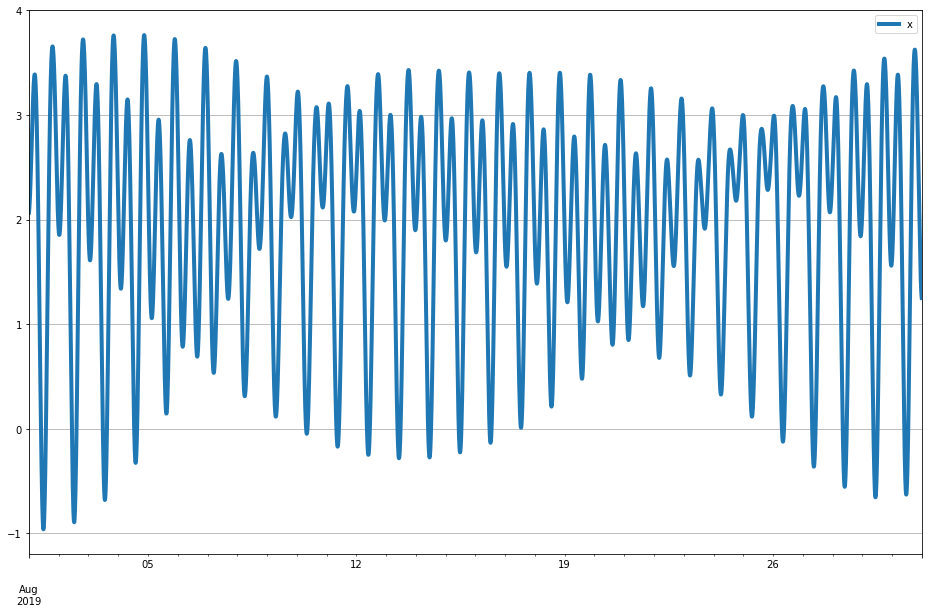

In [16]:
%matplotlib inline

width = 16
height = 10
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import matplotlib.pyplot as plt
import pandas as pd
import requests
def tide(station, begin, end, product, datum = 'MLLW', units = 'metric', time_format='lst_ldt', output='csv', web_service='Web Services'):
    station_id = station
    product = product
    begin_date = begin
    end_date = end
    request = requests.get('https://tidesandcurrents.noaa.gov/api/datagetter?begin_date='+begin_date+' 00:00&end_date='+end_date+' 23:59&station='+station_id+'&product='+product+'&datum=+'+datum+'+&units=+'+units+'+&time_zone='+time_format+'&application='+web_service+'&format='+output)
    f = request.text
    time = []
    v = []
    for str in f.split('\n')[1:-1]:
        time.append(pd.to_datetime(str.split(',')[0]))
        #print(float(str.split(',')[-1]))
        v.append(float(str.split(',')[-1]))
    df = pd.DataFrame({'x': v}, index=time)
    return df

df = tide(station='9447130',begin='20190801',end='20190830',product = 'predictions')
fig = plt.figure()
ax=fig.add_subplot(111)
df.plot(linewidth=4, label='Water level', ax = ax, grid=True, legend=True)

In [20]:
import chart_studio.plotly as py
import plotly.graph_objs as go
%matplotlib inline

begin_date = '20190807'
end_date = '20190831'
Sne = tide(station='9448576',begin=begin_date,end=end_date,product = 'predictions')
Tac = tide(station='9446484',begin=begin_date,end=end_date,product = 'predictions')
# df = df1 - df

Sne.head()
Tac.head()

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=Sne.index, y=Sne['x'],
                    mode='lines',
                    name='Sneeosh'))
fig.add_trace(go.Scatter(x=Tac.index, y=Tac['x'],
                    mode='lines',
                    name='Tacoma'))
# Edit the layout
fig.update_layout(title='Tidal Predictions at Sneeoosh Point and Tacoma',
                   xaxis_title='Date',
                   yaxis_title='Water Level (m)')

fig.show()

In [18]:
#Copyright (C) [2019] by [Tianxiang "Ronnie" Gao] <[tienhsiangkao@gmail.com]>
#
#Permission to use, copy, modify, and/or distribute this software for any purpose with or without fee is hereby granted.#
#
#THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY SPECIAL, DIRECT, INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF THIS SOFTWARE.
from argparse import ArgumentParser

import re
import pandas as pd
import numpy as np
import time
import sys
from zipfile import ZipFile
import sys




start = time.time()


filename = 'Skagit.KMZ'

def kmz_parser(filename):

    kmz = ZipFile(filename, 'r')
    kml = kmz.open('doc.kml', 'r').read()

    t = []
    lon = []
    lat = []
    alt = []
    lat = re.split('<latitude>|</latitude>', kml.decode())
    lon = re.split('<longitude>|</longitude>', kml.decode())
#     for lines in obj[1:]:
#         text = lines.split('<BR>')[6]
#         temp0 = str(re.findall("= \S*",text))[4:-2]
#         text = lines.split('<BR>')[8]
#         temp1 = str(re.findall("= \S*"+' \D*',text))[4:-2]
#         t.append(pd.pandas.to_datetime(temp0+' '+ temp1, utc= True))

#         text = re.split('<coordinates>|</coordinates>',lines)[-2].split(',')

#         x, y, z = text
#         lon.append(x)
#         lat.append(y)
#         alt.append(z)

    data = pd.DataFrame(data=np.transpose(np.array([lon, lat])),
                        columns=['lon', 'lat'])
    return data

def tz_convert(data, timezone='US/Pacific'):
    data = data.tz_convert(timezone)
    data.index = pd.DatetimeIndex([i.replace(tzinfo=None) for i in data.index])
    return data

data = kmz_parser(str(filename))



# data.to_csv(filename[:-4]+'.csv')
data

,lon,lat
0,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<kml x...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<kml x..."
1,-122.495222,48.374431
2,\n\t\t<latitude>48.374431</latitude>\n\t\t<alt...,\n\t\t<altitude>0</altitude>\n\t\t<heading>0</...
